In [6]:
from bs4 import BeautifulSoup  
from urllib.request import urlopen
from IPython.display import Image
import random
import numpy as np
#xml_page = urlopen("https://rss.nytimes.com/services/xml/rss/nyt/Health.xml")   # Opens whatever page we are requesting
                                                            # This source is from the New York Times
                                                                #https://rss.nytimes.com/services/xml/rss/nyt/Health.xml
                                                                #http://rss.cnn.com/rss/cnn_health.rss
#bs_obj = BeautifulSoup(xml_page, 'xml')# converts it into BS

#print(bs_obj.prettify()) # makes it more readable


In [1]:
rssFeeds = ["https://rss.nytimes.com/services/xml/rss/nyt/Health.xml", "http://rss.cnn.com/rss/cnn_health.rss"]
randNums = []
listOfTitles = []
listOfLinks = []
def fillRandomNums(min, max):
    for i in range(0,5):
        randNums.append(random.randint(min, max))
def tagExtractor(url, tag, start):
    xml_page = urlopen(url)   #opens whatever page we are requesting
    bs_obj = BeautifulSoup(xml_page, 'xml') # converts it into BS
    bs_obj.prettify()
    listOfTags = bs_obj.find_all(tag)
    listOfTags = listOfTags[start:]
    for i in range(0, len(listOfTags)):
        tagName = listOfTags[i].getText()
        listOfTags.pop(i)
        listOfTags.insert(i,tagName)
    while '' in listOfTags:
        listOfTags.remove('')
    return(listOfTags)
def printTag(listOfTags, num):
    return(listOfTags[num])
#tagExtractor(rssFeeds[0], "title")


In [142]:
import pandas as pd
columnNames = []
countries = []
dates = []
months = []
duplicates = []
cv_DF = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
for column in cv_DF:
    columnNames.append(column)
dates = columnNames[4:]
currentDate = columnNames[len(columnNames) - 1]
weeks = dates[::7]
weeks 


['1/22/20',
 '1/29/20',
 '2/5/20',
 '2/12/20',
 '2/19/20',
 '2/26/20',
 '3/4/20',
 '3/11/20',
 '3/18/20',
 '3/25/20']

In [141]:
countries = cv_DF["Country/Region"]
countries_array = np.array(countries)
countries_array

provinces = cv_DF["Province/State"].replace(np.nan, '')
provinces_array = np.array(provinces)
provinces_array



region_name_array = []
for i in range(len(countries_array)):
    region_name_array.append(provinces_array[i] + ", " + countries_array[i])

In [150]:
########################################
############ BAR GRAPH #################
########################################
total_array = []
indicesOfTopTen = []
total_by_time_top_ten = []

for i in range(len(region_name_array)):
    total = cv_DF[currentDate][i]
    total_array.append(total)

sorted_region_name_array = []

sorted_total_array = np.sort(total_array)[::-1]
sorted_total_array = sorted_total_array[:10]
#print(sorted_total_array)

for total in sorted_total_array:
    indicesOfTopTen.append(total_array.index(total))
for indicie in indicesOfTopTen:
    sorted_region_name_array.append(region_name_array[indicie])

for indicie in indicesOfTopTen:
    num_cases = []
    for week in weeks:
        num_cases.append(cv_DF[week][indicie])
    total_by_time_top_ten.append(num_cases)
total_by_time_top_ten

[[1, 5, 11, 12, 13, 57, 149, 1281, 7783, 65778],
 [0, 0, 2, 3, 3, 453, 3089, 12462, 35713, 74386],
 [444, 3554, 19665, 33366, 62031, 65187, 67332, 67773, 67800, 67801],
 [0, 0, 1, 2, 2, 13, 222, 2277, 13910, 49515],
 [0, 4, 12, 16, 16, 27, 262, 1908, 12327, 37323],
 [0, 5, 6, 11, 12, 18, 285, 2281, 9043, 25233],
 [0, 0, 0, 0, 2, 139, 2922, 9000, 17361, 27017],
 [0, 0, 2, 9, 9, 13, 85, 456, 2626, 9529],
 [0, 0, 0, 0, 0, 1, 90, 652, 3028, 10897],
 [1, 4, 19, 28, 31, 1261, 5621, 7755, 8413, 9137]]

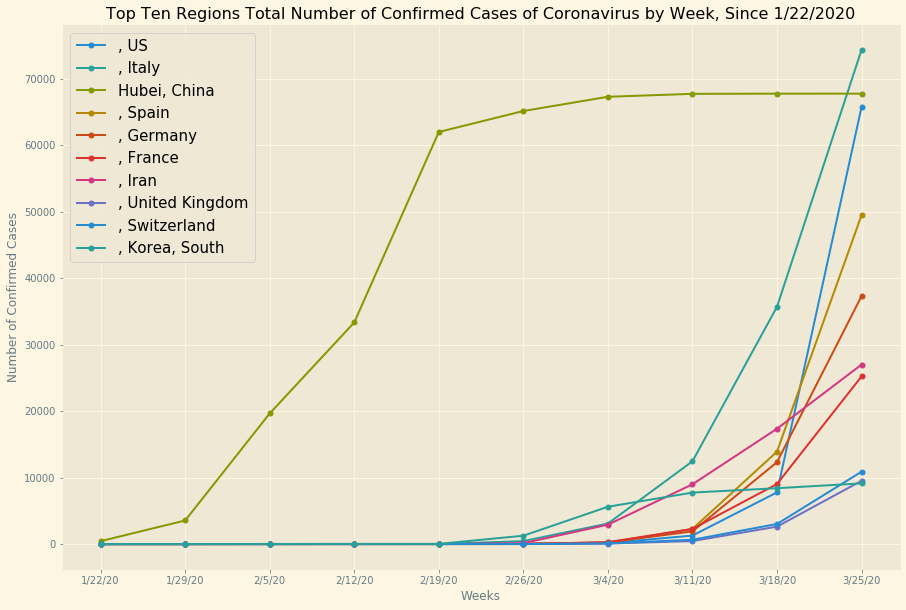

In [182]:
#########################################
############ LINE GRAPH #################
#########################################
fig = plot.figure(figsize = (15, 10)) #size of graph
#size of graph
for i in range(len(total_by_time_top_ten)):
    plot.plot(weeks,total_by_time_top_ten[i], label = sorted_region_name_array[i], marker='o', markersize=5)
# Labeling the X-axis 
plot.xlabel('Weeks') 
# Labeling the Y-axis 
plot.ylabel('Number of Confirmed Cases') 
# Give a title to the graph
plot.title('Top Ten Regions Total Number of Confirmed Cases of Coronavirus by Week, Since 1/22/2020') 
plot.legend(fontsize = 15)
#plot.show()
fig.savefig('output/line2.png')

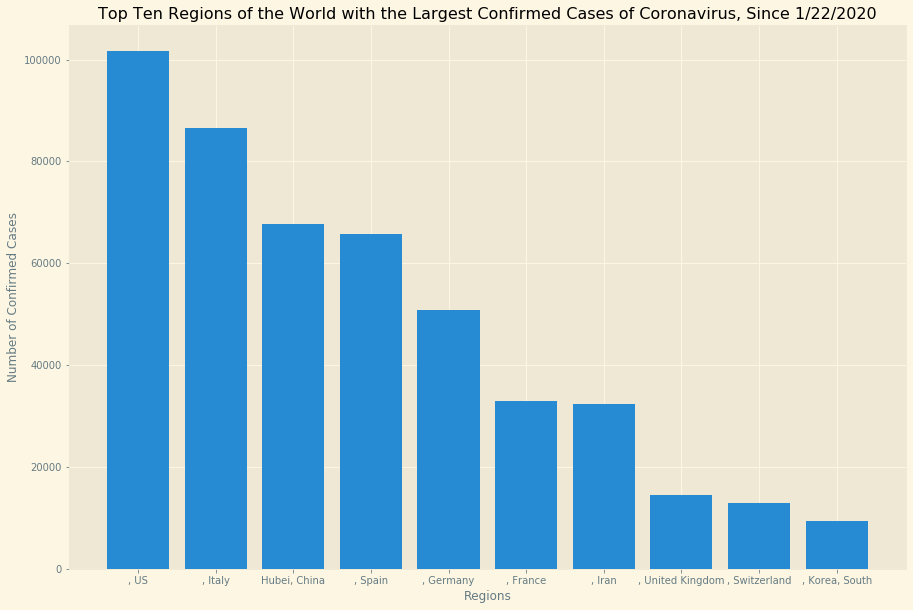

In [181]:
import matplotlib.pyplot as plot
%matplotlib inline

########################################
############ BAR GRAPH #################
########################################
length = len(sorted_total_array)
bar_count = np.arange(1, length + 1)
plot.style.use('Solarize_Light2')# grayish graph used
fig = plot.figure(figsize = (15, 10)) #size of graph
plot.title("Top Ten Regions of the World with the Largest Confirmed Cases of Coronavirus, Since 1/22/2020")
plot.xlabel("Regions")
plot.ylabel("Number of Confirmed Cases")
x_data = sorted_region_name_array
y_data = sorted_total_array
plot.xticks(bar_count, x_data) # x-ticks helps label each category. 
plot.bar(bar_count, y_data, width= 0.8) #this is a bar graph; takes i
fig.savefig('output/bar1.png')

In [114]:
#########################################
############ LINE GRAPH #################
#########################################
total_by_time_array = []

# for date in dates:
#     total_of_time = 0
#     for num in cv_DF[date].astype(float):
#         total_of_time += num
#     total_by_time_array.append(total_of_time)

for week in weeks:
    total_of_time = 0
    for num in cv_DF[week].astype(float):
        total_of_time += num
    total_by_time_array.append(total_of_time)    

total_by_time_array  # the total confirmed for each date in dates

[555.0,
 6166.0,
 27635.0,
 45221.0,
 75639.0,
 81388.0,
 95120.0,
 125875.0,
 214821.0,
 467653.0]

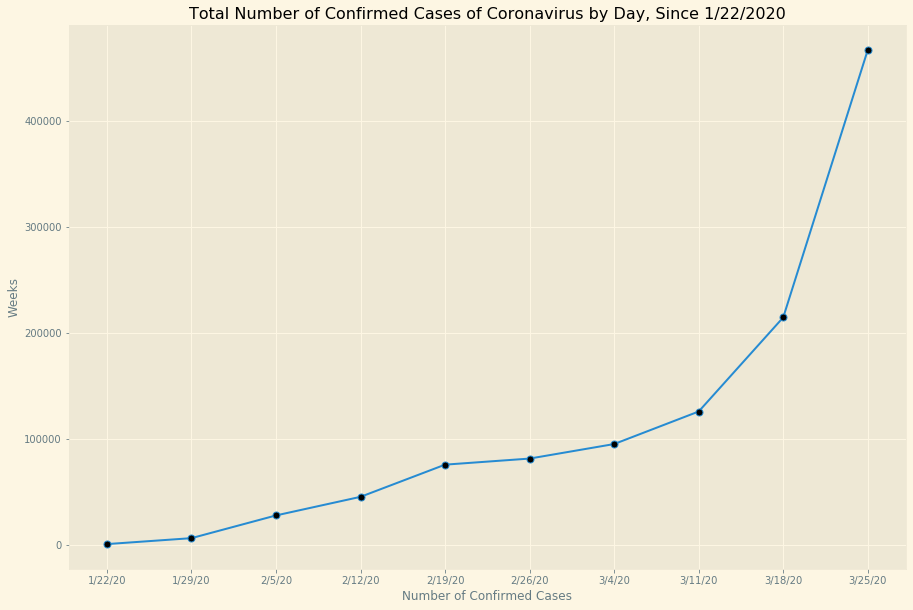

In [180]:
#########################################
############ LINE GRAPH #################
#########################################
fig = plot.figure(figsize = (15, 10)) 
#size of graph
plot.plot(weeks,total_by_time_array, marker='o', markerfacecolor='black', markersize=7)
# Labeling the X-axis 
plot.xlabel('Number of Confirmed Cases') 
# Labeling the Y-axis 
plot.ylabel('Weeks') 
# Give a title to the graph
plot.title('Total Number of Confirmed Cases of Coronavirus by Day, Since 1/22/2020') 
#plot.show()
fig.savefig('output/line1.png')

In [ ]:
"""
    html_file= open("output/Coronavirus.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_output()

In [222]:
def html_index(): 
    output_string = """
    <!DOCTYPE HTML>
<html>
<!DOCTYPE HTML>
<html>

<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
  
  <style>
  html
{ height: 100%;}

*{ margin: 0;
  padding: 0;}

body
{ font: normal .80em 'trebuchet ms', arial, sans-serif;
  background: #F0EFE2;
  color: #777;}

p{ padding: 0 0 20px 0;
  line-height: 1.7em;}

img
{ border: 0;}

h1, h2, h3, h4, h5, h6 
{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #43423F;
  margin: 0 0 15px 0;
  padding: 15px 0 5px 0;}

h2{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #1293EE;}

h4, h5, h6
{ margin: 0;
  padding: 0 0 5px 0;
  font: normal 120% arial, sans-serif;
  color: #1293EE;}

h5, h6
{ font: italic 95% arial, sans-serif;
  padding: 0 0 15px 0;
  color: #000;}

h6
{ color: #362C20;}

a, a:hover
{ outline: none;
  text-decoration: underline;
  color: #CC0000;}

a:hover
{ text-decoration: none;}

.left
{ float: left;
  width: auto;
  margin-right: 10px;}

.right
{ float: right; 
  width: auto;
  margin-left: 10px;}

.center
{ display: block;
  text-align: center;
  margin: 20px auto;}

blockquote
{ margin: 20px 0; 
  padding: 10px 20px 0 20px;
  border: 1px solid #E5E5DB;
  background: #FFF;}

ul
{ margin: 2px 0 22px 17px;}

ul li
{ list-style-type: circle;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 5px;}

ol
{ margin: 8px 0 22px 20px;}

ol li
{ margin: 0 0 11px 0;}

#main, #logo, #menubar, #site_content, #footer
{ margin-left: auto; 
  margin-right: auto;}

#header
{ background: #A80000;
  height: 240px;}

#logo
{ width: 825px;
  position: relative;
  height: 168px;
  background: #A80000 url(logo.png) no-repeat;}

#logo #logo_text 
{ position: absolute; 
  top: 20px;
  left: 0;}

#logo h1, #logo h2
{ font: normal 300% 'century gothic', arial, sans-serif;
  border-bottom: 0;
  text-transform: none;
  margin: 0;}

#logo_text h1, #logo_text h1 a, #logo_text h1 a:hover 
{ padding: 22px 0 0 0;
  color: #FFF;
  letter-spacing: 0.1em;
  text-decoration: none;}

#logo_text h1 a .logo_colour
{ color: #FAF700;}

#logo_text h2
{ font-size: 100%;
  padding: 4px 0 0 0;
  color: #DDD;}

#menubar
{ width: 877px;
  height: 72px;
  padding: 0;
  background: #5A2C24 url(menu.png) repeat-x;} 

ul#menu, ul#menu li
{ float: left;
  margin: 0; 
  padding: 0;}

ul#menu li
{ list-style: none;}

ul#menu li a
{ letter-spacing: 0.1em;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  display: block; 
  float: left; 
  height: 37px;
  padding: 29px 26px 6px 26px;
  text-align: center;
  color: #FFF;
  text-transform: uppercase;
  text-decoration: none;
  background: transparent;} 

ul#menu li a:hover, ul#menu li.selected a, ul#menu li.selected a:hover
{ color: #FFF;
  background: #451C1B url(menu_select.png) repeat-x;}

#site_content
{ width: 837px;
  overflow: hidden;
  margin: 0 auto 0 auto;
  padding: 20px 24px 20px 37px;
  background: #FFF url(content.png) repeat-y;} 

.sidebar
{ float: right;
  width: 190px;
  padding: 0 15px 20px 15px;}

.sidebar ul
{ width: 178px; 
  padding: 4px 0 0 0; 
  margin: 4px 0 30px 0;}

.sidebar li
{ list-style: none; 
  padding: 0 0 7px 0; }

.sidebar li a, .sidebar li a:hover
{ padding: 0 0 0 40px;
  display: block;
  background: transparent url(link.png) no-repeat left center;} 

.sidebar li a.selected
{ color: #444;
  text-decoration: none;} 

#content
{ text-align: left;
  width: 595px;
  padding: 0;}

#content ul
{ margin: 2px 0 22px 0px;}

#content ul li
{ list-style-type: none;
  background: url(bullet.png) no-repeat;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 25px;
  line-height: 1.5em;}

#footer
{ width: 878px;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  height: 33px;
  padding: 24px 0 5px 0;
  text-align: center; 
  background: #29425E url(footer.png) repeat-x;
  color: #FFF;
  text-transform: uppercase;
  letter-spacing: 0.1em;}

#footer a
{ color: #FFF;
  text-decoration: none;}

#footer a:hover
{ color: #FFF;
  text-decoration: underline;}

.search
{ color: #5D5D5D; 
  border: 1px solid #BBB; 
  width: 134px; 
  padding: 4px; 
  font: 100% arial, sans-serif;}

#colours
{ height: 0px;
  text-align: right;
  padding: 66px 16px 0px 300px;}
  
.form_settings
{ margin: 15px 0 0 0;}

.form_settings p
{ padding: 0 0 4px 0;}

.form_settings span
{ float: left; 
  width: 200px; 
  text-align: left;}
  
.form_settings input, .form_settings textarea
{ padding: 5px; 
  width: 299px; 
  font: 100% arial; 
  border: 1px solid #E5E5DB; 
  background: #FFF; 
  color: #47433F;}
  
.form_settings .submit
{ font: 100% arial; 
  border: 1px solid; 
  width: 99px; 
  margin: 0 0 0 212px; 
  height: 33px;
  padding: 2px 0 3px 0;
  cursor: pointer; 
  background: #7D0F0F; 
  color: #FFF;}

.form_settings textarea, .form_settings select
{ font: 100% arial; 
  width: 299px;}

.form_settings select
{ width: 310px;}

.form_settings .checkbox
{ margin: 4px 0; 
  padding: 0; 
  width: 14px;
  border: 0;
  background: none;}

.separator
{ width: 100%;
  height: 0;
  border-top: 1px solid #D9D5CF;
  border-bottom: 1px solid #FFF;
  margin: 0 0 20px 0;}
  
table
{ margin: 10px 0 30px 0;}

table tr th, table tr td
{ background: #3B3B3B;
  color: #FFF;
  padding: 7px 4px;
  text-align: left;}
  
table tr td
{ background: #F0EFE2;
  color: #47433F;
  border-top: 1px solid #FFF;}
}
}
</style>
<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li class="selected"><a href="index.html">Home</a></li>
          <li><a href="examples.html">Self-Checker</a></li>
          <li><a href="page.html">News Updates</a></li>
          <li><a href="another_page.html">Search Engine</a></li>
          <li><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="site_content">
      <div id="content">
        <!-- insert the page content here -->
        <h1>Welcome to the COVID-19 Information Center!</h1>
        <p>This website was created by Manu Ravela and Arvind Ganeshkumar. This was originally an HTML template that we morphed to our purposes using python, javascript, and HTML. </p>
		<p>Our Project puts all of the important aspects regarding the Coronavirus. It allows people to check for the virus themselves by taking the symptom test. It allows people to stay up to date with the latest news, making sure they know every new fact about the virus as and when it is released to the public. It has a built in search engine that lets the people look up any questions they have about COVID-19, that gives them results that are pulled directly from the CDC. This way, they know that their information is coming directly from a reliable source. It also has a feature that pulls up all of the nearest care centers, in case they need to get medical help immediately. </p>
		<p>Use the tabs at the top of the page to navigate these features! We hope you like our product! </p>
      </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
  </div>
</body>
</html>
"""
    html_file= open("output/index.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_index()

In [229]:
def html_updates(): 
    output_string = """
<!DOCTYPE HTML>
<html>

<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
  
  <style>
  html
{ height: 100%;}

*{ margin: 0;
  padding: 0;}

body
{ font: normal .80em 'trebuchet ms', arial, sans-serif;
  background: #F0EFE2;
  color: #777;}

p{ padding: 0 0 20px 0;
  line-height: 1.7em;}

img
{ border: 0;}

h1, h2, h3, h4, h5, h6 
{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #43423F;
  margin: 0 0 15px 0;
  padding: 15px 0 5px 0;}

h2{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #1293EE;}

h4, h5, h6
{ margin: 0;
  padding: 0 0 5px 0;
  font: normal 120% arial, sans-serif;
  color: #1293EE;}

h5, h6
{ font: italic 95% arial, sans-serif;
  padding: 0 0 15px 0;
  color: #000;}

h6
{ color: #362C20;}

a, a:hover
{ outline: none;
  text-decoration: underline;
  color: #CC0000;}

a:hover
{ text-decoration: none;}

.left
{ float: left;
  width: auto;
  margin-right: 10px;}

.right
{ float: right; 
  width: auto;
  margin-left: 10px;}

.center
{ display: block;
  text-align: center;
  margin: 20px auto;}

blockquote
{ margin: 20px 0; 
  padding: 10px 20px 0 20px;
  border: 1px solid #E5E5DB;
  background: #FFF;}

ul
{ margin: 2px 0 22px 17px;}

ul li
{ list-style-type: circle;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 5px;}

ol
{ margin: 8px 0 22px 20px;}

ol li
{ margin: 0 0 11px 0;}

#main, #logo, #menubar, #site_content, #footer
{ margin-left: auto; 
  margin-right: auto;}

#header
{ background: #A80000;
  height: 240px;}

#logo
{ width: 825px;
  position: relative;
  height: 168px;
  background: #A80000 url(logo.png) no-repeat;}

#logo #logo_text 
{ position: absolute; 
  top: 20px;
  left: 0;}

#logo h1, #logo h2
{ font: normal 300% 'century gothic', arial, sans-serif;
  border-bottom: 0;
  text-transform: none;
  margin: 0;}

#logo_text h1, #logo_text h1 a, #logo_text h1 a:hover 
{ padding: 22px 0 0 0;
  color: #FFF;
  letter-spacing: 0.1em;
  text-decoration: none;}

#logo_text h1 a .logo_colour
{ color: #FAF700;}

#logo_text h2
{ font-size: 100%;
  padding: 4px 0 0 0;
  color: #DDD;}

#menubar
{ width: 877px;
  height: 72px;
  padding: 0;
  background: #5A2C24 url(menu.png) repeat-x;} 

ul#menu, ul#menu li
{ float: left;
  margin: 0; 
  padding: 0;}

ul#menu li
{ list-style: none;}

ul#menu li a
{ letter-spacing: 0.1em;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  display: block; 
  float: left; 
  height: 37px;
  padding: 29px 26px 6px 26px;
  text-align: center;
  color: #FFF;
  text-transform: uppercase;
  text-decoration: none;
  background: transparent;} 

ul#menu li a:hover, ul#menu li.selected a, ul#menu li.selected a:hover
{ color: #FFF;
  background: #451C1B url(menu_select.png) repeat-x;}

#site_content
{ width: 837px;
  overflow: hidden;
  margin: 0 auto 0 auto;
  padding: 20px 24px 20px 37px;
  background: #FFF url(content.png) repeat-y;} 

.sidebar
{ float: right;
  width: 190px;
  padding: 0 15px 20px 15px;}

.sidebar ul
{ width: 178px; 
  padding: 4px 0 0 0; 
  margin: 4px 0 30px 0;}

.sidebar li
{ list-style: none; 
  padding: 0 0 7px 0; }

.sidebar li a, .sidebar li a:hover
{ padding: 0 0 0 40px;
  display: block;
  background: transparent url(link.png) no-repeat left center;} 

.sidebar li a.selected
{ color: #444;
  text-decoration: none;} 

#content
{ text-align: left;
  width: 595px;
  padding: 0;}

#content ul
{ margin: 2px 0 22px 0px;}

#content ul li
{ list-style-type: none;
  background: url(bullet.png) no-repeat;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 25px;
  line-height: 1.5em;}

#footer
{ width: 878px;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  height: 33px;
  padding: 24px 0 5px 0;
  text-align: center; 
  background: #29425E url(footer.png) repeat-x;
  color: #FFF;
  text-transform: uppercase;
  letter-spacing: 0.1em;}

#footer a
{ color: #FFF;
  text-decoration: none;}

#footer a:hover
{ color: #FFF;
  text-decoration: underline;}

.search
{ color: #5D5D5D; 
  border: 1px solid #BBB; 
  width: 134px; 
  padding: 4px; 
  font: 100% arial, sans-serif;}

#colours
{ height: 0px;
  text-align: right;
  padding: 66px 16px 0px 300px;}
  
.form_settings
{ margin: 15px 0 0 0;}

.form_settings p
{ padding: 0 0 4px 0;}

.form_settings span
{ float: left; 
  width: 200px; 
  text-align: left;}
  
.form_settings input, .form_settings textarea
{ padding: 5px; 
  width: 299px; 
  font: 100% arial; 
  border: 1px solid #E5E5DB; 
  background: #FFF; 
  color: #47433F;}
  
.form_settings .submit
{ font: 100% arial; 
  border: 1px solid; 
  width: 99px; 
  margin: 0 0 0 212px; 
  height: 33px;
  padding: 2px 0 3px 0;
  cursor: pointer; 
  background: #7D0F0F; 
  color: #FFF;}

.form_settings textarea, .form_settings select
{ font: 100% arial; 
  width: 299px;}

.form_settings select
{ width: 310px;}

.form_settings .checkbox
{ margin: 4px 0; 
  padding: 0; 
  width: 14px;
  border: 0;
  background: none;}

.separator
{ width: 100%;
  height: 0;
  border-top: 1px solid #D9D5CF;
  border-bottom: 1px solid #FFF;
  margin: 0 0 20px 0;}
  
table
{ margin: 10px 0 30px 0;}

table tr th, table tr td
{ background: #3B3B3B;
  color: #FFF;
  padding: 7px 4px;
  text-align: left;}
  
table tr td
{ background: #F0EFE2;
  color: #47433F;
  border-top: 1px solid #FFF;}
}
}
</style>
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li><a href="output/index.html">Home</a></li>
          <li><a href="output/examples.html">Self-Checker</a></li>
          <li class="selected"><a href="page.html">News Updates</a></li>
          <li><a href="another_page.html">Search Engine</a></li>
          <li><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="content_header"></div>
    <div id="site_content">
      <div class="sidebar">
        <!-- insert your sidebar items here -->
        <h3>Latest News</h3>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <p></p>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <h3>Useful Links</h3>
        <ul>
          <li><a href="#">link 1</a></li>
          <li><a href="#">link 2</a></li>
          <li><a href="#">link 3</a></li>
          <li><a href="#">link 4</a></li>
        </ul>
        <h3>Search</h3>
        <form method="post" action="#" id="search_form">
          <p>
            <input class="search" type="text" name="search_field" value="Enter keywords....." />
            <input name="search" type="image" style="border: 0; margin: 0 0 -9px 5px;" src="style/search.png" alt="Search" title="Search" />
          </p>
        </form>
      </div>
      <div id="content">
        <!-- insert the page content here -->
        <h1>Latest News Updates</h1> 
        <br><br>
        """
    outputHeadlines = ""
    listOfTitles = tagExtractor(rssFeeds[0], "title", 2)
    listOfLinks = tagExtractor(rssFeeds[0], "link", 3)
    for i in range(0,10):
        outputHeadlines += "<h4 style = 'color: black'>" + printTag(listOfTitles, i) + "</h4><br> <a href = ' "
        outputHeadlines += printTag(listOfLinks, i) + "'>" + printTag(listOfLinks, i) + "</a> <br><br><br> "

    listOfTitles = tagExtractor(rssFeeds[1], "title", 2)
    listOfLinks = tagExtractor(rssFeeds[1], "link", 3)
    for i in range(0,10):
        outputHeadlines += "<h4 style = 'color: black'>" + printTag(listOfTitles, i) + "</h4><br> <a href = ' "
        outputHeadlines += printTag(listOfLinks, i)+ "'>" + printTag(listOfLinks, i) + "</a> <br><br><br> "
        
    output_string += outputHeadlines
    output_string += """
          </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
      </div>
    </body>
    </html>
    """
    html_file= open("output/page.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_updates()

In [224]:
def html_survey():
    output_string += """
    <!DOCTYPE HTML>
<html>

<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
  
    <style>
  html
{ height: 100%;}

*{ margin: 0;
  padding: 0;}

body
{ font: normal .80em 'trebuchet ms', arial, sans-serif;
  background: #F0EFE2;
  color: #777;}

p{ padding: 0 0 20px 0;
  line-height: 1.7em;}

img
{ border: 0;}

h1, h2, h3, h4, h5, h6 
{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #43423F;
  margin: 0 0 15px 0;
  padding: 15px 0 5px 0;}

h2{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #1293EE;}

h4, h5, h6
{ margin: 0;
  padding: 0 0 5px 0;
  font: normal 120% arial, sans-serif;
  color: #1293EE;}

h5, h6
{ font: italic 95% arial, sans-serif;
  padding: 0 0 15px 0;
  color: #000;}

h6
{ color: #362C20;}

a, a:hover
{ outline: none;
  text-decoration: underline;
  color: #CC0000;}

a:hover
{ text-decoration: none;}

.left
{ float: left;
  width: auto;
  margin-right: 10px;}

.right
{ float: right; 
  width: auto;
  margin-left: 10px;}

.center
{ display: block;
  text-align: center;
  margin: 20px auto;}

blockquote
{ margin: 20px 0; 
  padding: 10px 20px 0 20px;
  border: 1px solid #E5E5DB;
  background: #FFF;}

ul
{ margin: 2px 0 22px 17px;}

ul li
{ list-style-type: circle;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 5px;}

ol
{ margin: 8px 0 22px 20px;}

ol li
{ margin: 0 0 11px 0;}

#main, #logo, #menubar, #site_content, #footer
{ margin-left: auto; 
  margin-right: auto;}

#header
{ background: #A80000;
  height: 240px;}

#logo
{ width: 825px;
  position: relative;
  height: 168px;
  background: #A80000 url(logo.png) no-repeat;}

#logo #logo_text 
{ position: absolute; 
  top: 20px;
  left: 0;}

#logo h1, #logo h2
{ font: normal 300% 'century gothic', arial, sans-serif;
  border-bottom: 0;
  text-transform: none;
  margin: 0;}

#logo_text h1, #logo_text h1 a, #logo_text h1 a:hover 
{ padding: 22px 0 0 0;
  color: #FFF;
  letter-spacing: 0.1em;
  text-decoration: none;}

#logo_text h1 a .logo_colour
{ color: #FAF700;}

#logo_text h2
{ font-size: 100%;
  padding: 4px 0 0 0;
  color: #DDD;}

#menubar
{ width: 877px;
  height: 72px;
  padding: 0;
  background: #5A2C24 url(menu.png) repeat-x;} 

ul#menu, ul#menu li
{ float: left;
  margin: 0; 
  padding: 0;}

ul#menu li
{ list-style: none;}

ul#menu li a
{ letter-spacing: 0.1em;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  display: block; 
  float: left; 
  height: 37px;
  padding: 29px 26px 6px 26px;
  text-align: center;
  color: #FFF;
  text-transform: uppercase;
  text-decoration: none;
  background: transparent;} 

ul#menu li a:hover, ul#menu li.selected a, ul#menu li.selected a:hover
{ color: #FFF;
  background: #451C1B url(menu_select.png) repeat-x;}

#site_content
{ width: 837px;
  overflow: hidden;
  margin: 0 auto 0 auto;
  padding: 20px 24px 20px 37px;
  background: #FFF url(content.png) repeat-y;} 

.sidebar
{ float: right;
  width: 190px;
  padding: 0 15px 20px 15px;}

.sidebar ul
{ width: 178px; 
  padding: 4px 0 0 0; 
  margin: 4px 0 30px 0;}

.sidebar li
{ list-style: none; 
  padding: 0 0 7px 0; }

.sidebar li a, .sidebar li a:hover
{ padding: 0 0 0 40px;
  display: block;
  background: transparent url(link.png) no-repeat left center;} 

.sidebar li a.selected
{ color: #444;
  text-decoration: none;} 

#content
{ text-align: left;
  width: 595px;
  padding: 0;}

#content ul
{ margin: 2px 0 22px 0px;}

#content ul li
{ list-style-type: none;
  background: url(bullet.png) no-repeat;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 25px;
  line-height: 1.5em;}

#footer
{ width: 878px;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  height: 33px;
  padding: 24px 0 5px 0;
  text-align: center; 
  background: #29425E url(footer.png) repeat-x;
  color: #FFF;
  text-transform: uppercase;
  letter-spacing: 0.1em;}

#footer a
{ color: #FFF;
  text-decoration: none;}

#footer a:hover
{ color: #FFF;
  text-decoration: underline;}

.search
{ color: #5D5D5D; 
  border: 1px solid #BBB; 
  width: 134px; 
  padding: 4px; 
  font: 100% arial, sans-serif;}

#colours
{ height: 0px;
  text-align: right;
  padding: 66px 16px 0px 300px;}
  
.form_settings
{ margin: 15px 0 0 0;}

.form_settings p
{ padding: 0 0 4px 0;}

.form_settings span
{ float: left; 
  width: 200px; 
  text-align: left;}
  
.form_settings input, .form_settings textarea
{ padding: 5px; 
  width: 299px; 
  font: 100% arial; 
  border: 1px solid #E5E5DB; 
  background: #FFF; 
  color: #47433F;}
  
.form_settings .submit
{ font: 100% arial; 
  border: 1px solid; 
  width: 99px; 
  margin: 0 0 0 212px; 
  height: 33px;
  padding: 2px 0 3px 0;
  cursor: pointer; 
  background: #7D0F0F; 
  color: #FFF;}

.form_settings textarea, .form_settings select
{ font: 100% arial; 
  width: 299px;}

.form_settings select
{ width: 310px;}

.form_settings .checkbox
{ margin: 4px 0; 
  padding: 0; 
  width: 14px;
  border: 0;
  background: none;}

.separator
{ width: 100%;
  height: 0;
  border-top: 1px solid #D9D5CF;
  border-bottom: 1px solid #FFF;
  margin: 0 0 20px 0;}
  
table
{ margin: 10px 0 30px 0;}

table tr th, table tr td
{ background: #3B3B3B;
  color: #FFF;
  padding: 7px 4px;
  text-align: left;}
  
table tr td
{ background: #F0EFE2;
  color: #47433F;
  border-top: 1px solid #FFF;}
}
}
</style>
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li><a href="index.html">Home</a></li>
          <li class="selected"><a href="examples.html">Self-Checker</a></li>
          <li><a href="page.html">News Updates</a></li>
          <li><a href="another_page.html">Search Engine</a></li>
          <li><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="content_header"></div>
    <div id="site_content">
      <div id="content">
        <!-- insert the page content here -->
        <h1>COVID-19 Self-Checker</h1>
        <p>This survey will only take a couple of minutes! You'll be asked a series of questions, and you just have to select 'Yes' or 'No' depending on how you feel.</p>
        <p>At the end, this program will come to a conclusion on what you may be going through, and it will give you suggestions on how to approach the matter. This information will be directly from the CDC!</p>
		<script>
	var hasCough = false;
	var hasPhlegm = false;
	var hasDryCough = false;
	var hasFever = false;
	var hasShortBreath = false;
	var hasSevereBreath = false;
	var hasLightBreath = false;
	var atRisk = false;
	
	var sympCounter = 0;
	
	function first()
	{
		var msg = "";
		msg += "Do take your time!"
		
		idWelcome.innerHTML = msg;
		idButton.value = "Begin";
		document.getElementById("idButton").setAttribute('onClick','questionOne()');
	}
	
	function questionOne()
	{
	
		idWelcome.innerHTML = "";
		idQuestion.innerHTML = "Do you have a cough?";
		idSelection.innerHTML = "<select id='idSelect'><option>Yes</option><option>No</option></select> <br/> <br/>";
		idButton.value = "Next Question";
		document.getElementById("idButton").setAttribute('onClick','questionOneAnswer()');
	}
	
	function questionOneAnswer()
	{
		if(idSelect.value == "Yes")
		{
			hasCough = true;
			whatCough();
		}
		else
		{
			hasCough = false;
			questionTwo();
		}
	}
	
	function whatCough()
	{
		idQuestion.innerHTML = "Do you have phlegm or is it a dry cough?";
		idSelection.innerHTML = "<select id='idSelect'><option>Phlegm</option><option>Dry Cough</option></select> <br/> <br/>"
		document.getElementById("idButton").setAttribute('onClick','whatCoughAnswer()');
	}
	
	function whatCoughAnswer()
	{
		if(idSelect.value == "Dry Cough")
		{
			hasDryCough = true;
			hasPhlegm = false;
			sympCounter = sympCounter + 1;
			questionTwo();
		}
		else
		{
			hasDryCough = false;
			hasPhlegm = true;
			questionTwo();
		}
	}
	
	function questionTwo()
	{
		idQuestion.innerHTML = "Do you have a fever?";
		idSelection.innerHTML = "<select id='idSelect'><option>Yes</option><option>No</option></select> <br/> <br/>";
		document.getElementById("idButton").setAttribute('onClick','questionTwoAnswer()');
	}
	
	function questionTwoAnswer()
	{
		if(idSelect.value == "Yes")
		{
			hasFever = true;
			sympCounter += 1;
			questionThree();
		}
		else
		{
			hasFever = false;
			questionThree();
		}
	}
	
	function questionThree()
	{
		idQuestion.innerHTML = "Do you have shortness of breath?";
		idSelection.innerHTML = "<select id='idSelect'><option>Yes</option><option>No</option></select> <br/> <br/>";
		document.getElementById("idButton").setAttribute('onClick','questionThreeAnswer()');
	}
	
	function questionThreeAnswer()
	{
		if(idSelect.value == "Yes")
		{
			hasShortBreath = true;
			howSevere();
		}
		else
		{
			hasShortBreath = false;
			otherIssues();
		}
	}
	
	function howSevere()
	{
		idQuestion.innerHTML = "Do you feel that this is severe? Are you gasping for air? Or do you feel that this is light shortness of breath?";
		idSelection.innerHTML = "<select id='idSelect'><option>Severe</option><option>Light</option></select> <br/> <br/>"
		document.getElementById("idButton").setAttribute('onClick','howSevereAnswer()');
	}
	
	function howSevereAnswer()
	{
		if(idSelect.value == "Severe")
		{
			hasSevereBreath = true;
			hasLightBreath = false;
			sympCounter = sympCounter + 1;
			otherIssues();
		}
		else
		{
			hasSevereBreath = false;
			hasLightBreath = true;
			otherIssues();
		}
	}
	
	function otherIssues()
	{
		idQuestion.innerHTML = "Do any of the following problems apply to you: HIV, Asthma, Respiratory Diseases, Kidney Problems? Are you 65 years or older? If any of these apply to you, please select 'Yes'!";
		idSelection.innerHTML = "<select id='idSelect'><option>Yes</option><option>No</option></select> <br/> <br/>"
		document.getElementById("idButton").setAttribute('onClick','otherIssuesAnswer()');
	}
	
	function otherIssuesAnswer()
	{
		if(idSelect.value == "Yes")
		{
			atRisk = true;
			finalQuestion();
		}
		else
		{
			atRisk = false;
			finalQuestion();
		}
	}
	
	function finalQuestion()
	{
		idQuestion.innerHTML = "Do you have any another symptoms you'd like to share?";
		idSelect = "";
		idSelection.innerHTML = "<input type='text' id='idTextbox' placeholder='Type your answer here'>"
		idButton.value = "Submit Survey";
		document.getElementById("idButton").setAttribute('onClick','endSurvey()');
	}
	
	function endSurvey()
	{
		idQuestion.innerHTML = "";
		idSelection.innerHTML = "";
		if(sympCounter == 3 && atRisk == true)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 3 symptoms of Covid-19, ";
			msg += "and you may be at risk of having the virus. The CDC would advise you to call your medical provider within 24 hours, ";
			msg += "because you have other medical conditions that may put you at a greater risk for complications from COVID-19. Also, ";
			msg += "you should begin home isolation, don't leave unless you're getting medical care. Do not take public transport, and be ";
			msg += " sure to get care if you feel worse!";
			
			idSelection.innerHTML = msg;
		}
		else if(sympCounter == 2 && atRisk == true)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 2 symptoms of Covid-19, ";
			msg += "and you may be at risk of having the virus. The CDC would advise you to call your medical provider within 24 hours, ";
			msg += "because you have other medical conditions that may put you at a greater risk for complications from COVID-19. Also, ";
			msg += "you should begin home isolation, don't leave unless you're getting medical care. Do not take public transport, and be ";
			msg += " sure to get care if you feel worse!";
			
			idSelection.innerHTML = msg;
		}
		else if(sympCounter == 1 && atRisk == true)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 1 symptom of Covid-19, ";
			msg += "and you may be at risk of having the virus. The CDC would advise you to call your medical provider within 24 hours, ";
			msg += "because you have other medical conditions that may put you at a greater risk for complications from COVID-19. Also, ";
			msg += "you should begin home isolation, don't leave unless you're getting medical care. Do not take public transport, and be ";
			msg += " sure to get care if you feel worse!";
			
			idSelection.innerHTML = msg;
		}
		else if(sympCounter == 3 && atRisk == false)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 3 symptoms of Covid-19, ";
			msg += "and you may be at risk of having the virus. The CDC would advise you to stay home and take rest. Maintain 6 feet of ";
			msg += "distance from everyone. Stay in home isolation until you are better. Please wash your hands regularly, and have good ";
			msg += "hygiene. If you seem to be getting worse, please call your health care provider, and carefully follow their instructions!";
			
			idSelection.innerHTML = msg;
		}
		else if(sympCounter == 2 && atRisk == false)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 2 symptoms of Covid-19, ";
			msg += "and you may be slightly at risk of having the virus. The CDC would advise you to stay home and take rest. Maintain 6 feet of ";
			msg += "distance from everyone. Please wash your hands regularly, and maintain good hygiene. If you seem to be getting worse, ";
			msg += "please call your health care provider, and carefully follow their instructions!";
			
			idSelection.innerHTML = msg;
		}
		else if(sympCounter == 1 && atRisk == false)
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have 1 symptom of Covid-19, ";
			msg += "and you most likely don't have the virus. But, the CDC would still advise you to stay home. ";
			msg += "Please wash your hands regularly, and maintain good hygiene. If you seem to be getting more symptoms, and you feel worse, ";
			msg += "please call your health care provider, and carefully follow their instructions!";
			
			idSelection.innerHTML = msg;
		}
		else
		{
			var msg = "";
			msg += "Based on the information you just provided us, we have come to the conclusion that you have no symptoms of Covid-19, ";
			msg += "and you do not have the virus. This doesn't mean you can do whatever you want. The CDC still advises that you to stay home. ";
			msg += "Going outside might cause you to contract symptoms that you wouldn't have otherwise gotten if you stayed at home. Continue "; 
			msg += "to wash your hands regularly, and always maintain good hygiene!"
			
			idSelection.innerHTML = msg;
		}
		
		idButton.value = "Reset";
		document.getElementById("idButton").setAttribute('onClick','last()');
		
	}
	
	function last()
	{
		idSelection.innerHTML = "";
		idWelcome.innerHTML = "Press 'Next' to begin!";
		idButton.value = "Next";
		document.getElementById("idButton").setAttribute('onClick','first()');
	}

	</script>
		
		
		<div id="idWelcome">Press 'Next' to begin!</div>
		<br>
		<div id="idQuestion"></div>
		<br>
		<div id="idSelection"></div>
		<br>
		<div id="idFinalMsg"></div>
		<br>
		<input id = "idButton" type = "button" value = "Next" onClick = "first()">
		<br>	
		
      </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
  </div>
</body>
</html>
"""
    html_file= open("output/examples.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_updates()

In [226]:
def html_engine():
    output_string = """
<!DOCTYPE HTML>
<html>

<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
  
    <style>
  html
{ height: 100%;}

*{ margin: 0;
  padding: 0;}

body
{ font: normal .80em 'trebuchet ms', arial, sans-serif;
  background: #F0EFE2;
  color: #777;}

p{ padding: 0 0 20px 0;
  line-height: 1.7em;}

img
{ border: 0;}

h1, h2, h3, h4, h5, h6 
{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #43423F;
  margin: 0 0 15px 0;
  padding: 15px 0 5px 0;}

h2{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #1293EE;}

h4, h5, h6
{ margin: 0;
  padding: 0 0 5px 0;
  font: normal 120% arial, sans-serif;
  color: #1293EE;}

h5, h6
{ font: italic 95% arial, sans-serif;
  padding: 0 0 15px 0;
  color: #000;}

h6
{ color: #362C20;}

a, a:hover
{ outline: none;
  text-decoration: underline;
  color: #CC0000;}

a:hover
{ text-decoration: none;}

.left
{ float: left;
  width: auto;
  margin-right: 10px;}

.right
{ float: right; 
  width: auto;
  margin-left: 10px;}

.center
{ display: block;
  text-align: center;
  margin: 20px auto;}

blockquote
{ margin: 20px 0; 
  padding: 10px 20px 0 20px;
  border: 1px solid #E5E5DB;
  background: #FFF;}

ul
{ margin: 2px 0 22px 17px;}

ul li
{ list-style-type: circle;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 5px;}

ol
{ margin: 8px 0 22px 20px;}

ol li
{ margin: 0 0 11px 0;}

#main, #logo, #menubar, #site_content, #footer
{ margin-left: auto; 
  margin-right: auto;}

#header
{ background: #A80000;
  height: 240px;}

#logo
{ width: 825px;
  position: relative;
  height: 168px;
  background: #A80000 url(logo.png) no-repeat;}

#logo #logo_text 
{ position: absolute; 
  top: 20px;
  left: 0;}

#logo h1, #logo h2
{ font: normal 300% 'century gothic', arial, sans-serif;
  border-bottom: 0;
  text-transform: none;
  margin: 0;}

#logo_text h1, #logo_text h1 a, #logo_text h1 a:hover 
{ padding: 22px 0 0 0;
  color: #FFF;
  letter-spacing: 0.1em;
  text-decoration: none;}

#logo_text h1 a .logo_colour
{ color: #FAF700;}

#logo_text h2
{ font-size: 100%;
  padding: 4px 0 0 0;
  color: #DDD;}

#menubar
{ width: 877px;
  height: 72px;
  padding: 0;
  background: #5A2C24 url(menu.png) repeat-x;} 

ul#menu, ul#menu li
{ float: left;
  margin: 0; 
  padding: 0;}

ul#menu li
{ list-style: none;}

ul#menu li a
{ letter-spacing: 0.1em;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  display: block; 
  float: left; 
  height: 37px;
  padding: 29px 26px 6px 26px;
  text-align: center;
  color: #FFF;
  text-transform: uppercase;
  text-decoration: none;
  background: transparent;} 

ul#menu li a:hover, ul#menu li.selected a, ul#menu li.selected a:hover
{ color: #FFF;
  background: #451C1B url(menu_select.png) repeat-x;}

#site_content
{ width: 837px;
  overflow: hidden;
  margin: 0 auto 0 auto;
  padding: 20px 24px 20px 37px;
  background: #FFF url(content.png) repeat-y;} 

.sidebar
{ float: right;
  width: 190px;
  padding: 0 15px 20px 15px;}

.sidebar ul
{ width: 178px; 
  padding: 4px 0 0 0; 
  margin: 4px 0 30px 0;}

.sidebar li
{ list-style: none; 
  padding: 0 0 7px 0; }

.sidebar li a, .sidebar li a:hover
{ padding: 0 0 0 40px;
  display: block;
  background: transparent url(link.png) no-repeat left center;} 

.sidebar li a.selected
{ color: #444;
  text-decoration: none;} 

#content
{ text-align: left;
  width: 595px;
  padding: 0;}

#content ul
{ margin: 2px 0 22px 0px;}

#content ul li
{ list-style-type: none;
  background: url(bullet.png) no-repeat;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 25px;
  line-height: 1.5em;}

#footer
{ width: 878px;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  height: 33px;
  padding: 24px 0 5px 0;
  text-align: center; 
  background: #29425E url(footer.png) repeat-x;
  color: #FFF;
  text-transform: uppercase;
  letter-spacing: 0.1em;}

#footer a
{ color: #FFF;
  text-decoration: none;}

#footer a:hover
{ color: #FFF;
  text-decoration: underline;}

.search
{ color: #5D5D5D; 
  border: 1px solid #BBB; 
  width: 134px; 
  padding: 4px; 
  font: 100% arial, sans-serif;}

#colours
{ height: 0px;
  text-align: right;
  padding: 66px 16px 0px 300px;}
  
.form_settings
{ margin: 15px 0 0 0;}

.form_settings p
{ padding: 0 0 4px 0;}

.form_settings span
{ float: left; 
  width: 200px; 
  text-align: left;}
  
.form_settings input, .form_settings textarea
{ padding: 5px; 
  width: 299px; 
  font: 100% arial; 
  border: 1px solid #E5E5DB; 
  background: #FFF; 
  color: #47433F;}
  
.form_settings .submit
{ font: 100% arial; 
  border: 1px solid; 
  width: 99px; 
  margin: 0 0 0 212px; 
  height: 33px;
  padding: 2px 0 3px 0;
  cursor: pointer; 
  background: #7D0F0F; 
  color: #FFF;}

.form_settings textarea, .form_settings select
{ font: 100% arial; 
  width: 299px;}

.form_settings select
{ width: 310px;}

.form_settings .checkbox
{ margin: 4px 0; 
  padding: 0; 
  width: 14px;
  border: 0;
  background: none;}

.separator
{ width: 100%;
  height: 0;
  border-top: 1px solid #D9D5CF;
  border-bottom: 1px solid #FFF;
  margin: 0 0 20px 0;}
  
table
{ margin: 10px 0 30px 0;}

table tr th, table tr td
{ background: #3B3B3B;
  color: #FFF;
  padding: 7px 4px;
  text-align: left;}
  
table tr td
{ background: #F0EFE2;
  color: #47433F;
  border-top: 1px solid #FFF;}
}
}
</style>
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li><a href="index.html">Home</a></li>
          <li><a href="examples.html">Self-Checker</a></li>
          <li><a href="page.html">News Updates</a></li>
          <li class="selected"><a href="another_page.html">Search Engine</a></li>
          <li><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="content_header"></div>
    <div id="site_content">
      <div class="sidebar">
        <!-- insert your sidebar items here -->
        <h3>Latest News</h3>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <p></p>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <h3>Useful Links</h3>
        <ul>
          <li><a href="#">link 1</a></li>
          <li><a href="#">link 2</a></li>
          <li><a href="#">link 3</a></li>
          <li><a href="#">link 4</a></li>
        </ul>
        <h3>Search</h3>
        <form method="post" action="#" id="search_form">
          <p>
            <input class="search" type="text" name="search_field" value="Enter keywords....." />
            <input name="search" type="image" style="border: 0; margin: 0 0 -9px 5px;" src="style/search.png" alt="Search" title="Search" />
          </p>
        </form>
      </div>
      <div id="content">
        <h1>Search Engine</h1>
        <script async src="https://cse.google.com/cse.js?cx=007417201984520759677:hskawspxaqq"></script>
        <div class="gcse-search"></div>
      </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
  </div>
</body>
</html>
"""
    html_file= open("output/another_page.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_engine()

In [227]:
def html_care():
    output_string = """
    <!DOCTYPE HTML>
<html>

  <style>
  html
{ height: 100%;}

*{ margin: 0;
  padding: 0;}

body
{ font: normal .80em 'trebuchet ms', arial, sans-serif;
  background: #F0EFE2;
  color: #777;}

p{ padding: 0 0 20px 0;
  line-height: 1.7em;}

img
{ border: 0;}

h1, h2, h3, h4, h5, h6 
{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #43423F;
  margin: 0 0 15px 0;
  padding: 15px 0 5px 0;}

h2{ font: normal 175% 'century gothic', arial, sans-serif;
  color: #1293EE;}

h4, h5, h6
{ margin: 0;
  padding: 0 0 5px 0;
  font: normal 120% arial, sans-serif;
  color: #1293EE;}

h5, h6
{ font: italic 95% arial, sans-serif;
  padding: 0 0 15px 0;
  color: #000;}

h6
{ color: #362C20;}

a, a:hover
{ outline: none;
  text-decoration: underline;
  color: #CC0000;}

a:hover
{ text-decoration: none;}

.left
{ float: left;
  width: auto;
  margin-right: 10px;}

.right
{ float: right; 
  width: auto;
  margin-left: 10px;}

.center
{ display: block;
  text-align: center;
  margin: 20px auto;}

blockquote
{ margin: 20px 0; 
  padding: 10px 20px 0 20px;
  border: 1px solid #E5E5DB;
  background: #FFF;}

ul
{ margin: 2px 0 22px 17px;}

ul li
{ list-style-type: circle;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 5px;}

ol
{ margin: 8px 0 22px 20px;}

ol li
{ margin: 0 0 11px 0;}

#main, #logo, #menubar, #site_content, #footer
{ margin-left: auto; 
  margin-right: auto;}

#header
{ background: #A80000;
  height: 240px;}

#logo
{ width: 825px;
  position: relative;
  height: 168px;
  background: #A80000 url(logo.png) no-repeat;}

#logo #logo_text 
{ position: absolute; 
  top: 20px;
  left: 0;}

#logo h1, #logo h2
{ font: normal 300% 'century gothic', arial, sans-serif;
  border-bottom: 0;
  text-transform: none;
  margin: 0;}

#logo_text h1, #logo_text h1 a, #logo_text h1 a:hover 
{ padding: 22px 0 0 0;
  color: #FFF;
  letter-spacing: 0.1em;
  text-decoration: none;}

#logo_text h1 a .logo_colour
{ color: #FAF700;}

#logo_text h2
{ font-size: 100%;
  padding: 4px 0 0 0;
  color: #DDD;}

#menubar
{ width: 877px;
  height: 72px;
  padding: 0;
  background: #5A2C24 url(menu.png) repeat-x;} 

ul#menu, ul#menu li
{ float: left;
  margin: 0; 
  padding: 0;}

ul#menu li
{ list-style: none;}

ul#menu li a
{ letter-spacing: 0.1em;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  display: block; 
  float: left; 
  height: 37px;
  padding: 29px 26px 6px 26px;
  text-align: center;
  color: #FFF;
  text-transform: uppercase;
  text-decoration: none;
  background: transparent;} 

ul#menu li a:hover, ul#menu li.selected a, ul#menu li.selected a:hover
{ color: #FFF;
  background: #451C1B url(menu_select.png) repeat-x;}

#site_content
{ width: 837px;
  overflow: hidden;
  margin: 0 auto 0 auto;
  padding: 20px 24px 20px 37px;
  background: #FFF url(content.png) repeat-y;} 

.sidebar
{ float: right;
  width: 190px;
  padding: 0 15px 20px 15px;}

.sidebar ul
{ width: 178px; 
  padding: 4px 0 0 0; 
  margin: 4px 0 30px 0;}

.sidebar li
{ list-style: none; 
  padding: 0 0 7px 0; }

.sidebar li a, .sidebar li a:hover
{ padding: 0 0 0 40px;
  display: block;
  background: transparent url(link.png) no-repeat left center;} 

.sidebar li a.selected
{ color: #444;
  text-decoration: none;} 

#content
{ text-align: left;
  width: 595px;
  padding: 0;}

#content ul
{ margin: 2px 0 22px 0px;}

#content ul li
{ list-style-type: none;
  background: url(bullet.png) no-repeat;
  margin: 0 0 6px 0; 
  padding: 0 0 4px 25px;
  line-height: 1.5em;}

#footer
{ width: 878px;
  font: normal 100% 'lucida sans unicode', arial, sans-serif;
  height: 33px;
  padding: 24px 0 5px 0;
  text-align: center; 
  background: #29425E url(footer.png) repeat-x;
  color: #FFF;
  text-transform: uppercase;
  letter-spacing: 0.1em;}

#footer a
{ color: #FFF;
  text-decoration: none;}

#footer a:hover
{ color: #FFF;
  text-decoration: underline;}

.search
{ color: #5D5D5D; 
  border: 1px solid #BBB; 
  width: 134px; 
  padding: 4px; 
  font: 100% arial, sans-serif;}

#colours
{ height: 0px;
  text-align: right;
  padding: 66px 16px 0px 300px;}
  
.form_settings
{ margin: 15px 0 0 0;}

.form_settings p
{ padding: 0 0 4px 0;}

.form_settings span
{ float: left; 
  width: 200px; 
  text-align: left;}
  
.form_settings input, .form_settings textarea
{ padding: 5px; 
  width: 299px; 
  font: 100% arial; 
  border: 1px solid #E5E5DB; 
  background: #FFF; 
  color: #47433F;}
  
.form_settings .submit
{ font: 100% arial; 
  border: 1px solid; 
  width: 99px; 
  margin: 0 0 0 212px; 
  height: 33px;
  padding: 2px 0 3px 0;
  cursor: pointer; 
  background: #7D0F0F; 
  color: #FFF;}

.form_settings textarea, .form_settings select
{ font: 100% arial; 
  width: 299px;}

.form_settings select
{ width: 310px;}

.form_settings .checkbox
{ margin: 4px 0; 
  padding: 0; 
  width: 14px;
  border: 0;
  background: none;}

.separator
{ width: 100%;
  height: 0;
  border-top: 1px solid #D9D5CF;
  border-bottom: 1px solid #FFF;
  margin: 0 0 20px 0;}
  
table
{ margin: 10px 0 30px 0;}

table tr th, table tr td
{ background: #3B3B3B;
  color: #FFF;
  padding: 7px 4px;
  text-align: left;}
  
table tr td
{ background: #F0EFE2;
  color: #47433F;
  border-top: 1px solid #FFF;}
}
}
</style>
<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style"/>
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li><a href="index.html">Home</a></li>
          <li><a href="examples.html">Self-Checker</a></li>
          <li><a href="page.html">News Updates</a></li>
          <li><a href="another_page.html">Search Engine</a></li>
          <li class="selected"><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="content_header"></div>
    <div id="site_content">
      <div class="sidebar">
        <!-- insert your sidebar items here -->
        <h3>Latest News</h3>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <p></p>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <h3>Useful Links</h3>
        <ul>
          <li><a href="#">link 1</a></li>
          <li><a href="#">link 2</a></li>
          <li><a href="#">link 3</a></li>
          <li><a href="#">link 4</a></li>
        </ul>
        <h3>Search</h3>
        <form method="post" action="#" id="search_form">
          <p>
            <input class="search" type="text" name="search_field" value="Enter keywords....." />
            <input name="search" type="image" style="border: 0; margin: 0 0 -9px 5px;" src="style/search.png" alt="Search" title="Search" />
          </p>
        </form>
      </div>
      <div id="content">
        <!-- insert the page content here -->
        <h1>Contact Us/Care Centers</h1>
        <p>Below is an example of how a contact form might look with this template:</p>
        <form action="#" method="post">
          <div class="form_settings">
            <p><span>Name</span><input class="contact" type="text" name="your_name" value="" /></p>
            <p><span>Email Address</span><input class="contact" type="text" name="your_email" value="" /></p>
            <p><span>Message</span><textarea class="contact textarea" rows="8" cols="50" name="your_enquiry"></textarea></p>
            <p style="padding-top: 15px"><span>&nbsp;</span><input class="submit" type="submit" name="contact_submitted" value="submit" /></p>
          </div>
        </form>
        <p><br /><br />NOTE: A contact form such as this would require some way of emailing the input to an email address.</p>
      </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
  </div>
</body>
</html>
    """
    html_file= open("output/contact.html.html","w") # writes and displays file in folder of choice
    html_file.write(output_string)
    html_file.close()
html_care()  

In [ ]:
running = False
import time

while running:
    html_output()
    time.sleep(3600)

In [153]:
<!DOCTYPE HTML>
<html>

<head>
  <title>COVID-19</title>
  <meta name="description" content="website description" />
  <meta name="keywords" content="website keywords, website keywords" />
  <meta http-equiv="content-type" content="text/html; charset=windows-1252" />
  <link rel="stylesheet" type="text/css" href="style.css" title="style" />
</head>

<body>
  <div id="main">
    <div id="header">
      <div id="logo">
        <div id="logo_text">
          <!-- class="logo_colour", allows you to change the colour of the text -->
          <h1><a href="index.html">COVID-19<span class="logo_colour"> Information</span></a></h1>
          <h2>~ all the information about the coronavirus in one place ~</h2>
        </div>
      </div>
      <div id="menubar">
        <ul id="menu">
          <!-- put class="selected" in the li tag for the selected page - to highlight which page you're on -->
          <li><a href="index.html">Home</a></li>
          <li><a href="examples.html">Self-Checker</a></li>
          <li class="selected"><a href="page.html">News Updates</a></li>
          <li><a href="another_page.html">Search Engine</a></li>
          <li><a href="contact.html">Care Centers</a></li>
        </ul>
      </div>
    </div>
    <div id="content_header"></div>
    <div id="site_content">
      <div class="sidebar">
        <!-- insert your sidebar items here -->
        <h3>Latest News</h3>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <p></p>
        <h4>New Website Launched</h4>
        <h5>January 1st, 2010</h5>
        <p>2010 sees the redesign of our website. Take a look around and let us know what you think.<br /><a href="#">Read more</a></p>
        <h3>Useful Links</h3>
        <ul>
          <li><a href="#">link 1</a></li>
          <li><a href="#">link 2</a></li>
          <li><a href="#">link 3</a></li>
          <li><a href="#">link 4</a></li>
        </ul>
        <h3>Search</h3>
        <form method="post" action="#" id="search_form">
          <p>
            <input class="search" type="text" name="search_field" value="Enter keywords....." />
            <input name="search" type="image" style="border: 0; margin: 0 0 -9px 5px;" src="style/search.png" alt="Search" title="Search" />
          </p>
        </form>
      </div>
      <div id="content">
        <!-- insert the page content here -->
        <h1>Latest News Updates</h1>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
        <p>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui.</p>
    outputHeadlines = ""
    listOfTitles = tagExtractor(rssFeeds[0], "title", 2)
    listOfLinks = tagExtractor(rssFeeds[0], "link", 3)
    for i in range(0,10):
        outputHeadlines += "<h3>" + printTag(listOfTitles, i) + "<br></h3> <a href = ' "
        outputHeadlines += printTag(listOfLinks, i) + "'>" + printTag(listOfLinks, i) + "</a> <br><br><br> "

    listOfTitles = tagExtractor(rssFeeds[1], "title", 2)
    listOfLinks = tagExtractor(rssFeeds[1], "link", 3)
    for i in range(0,10):
        outputHeadlines += "<h3>" + printTag(listOfTitles, i) + "<br></h3> <a href = ' "
        outputHeadlines += printTag(listOfLinks, i)+ "'>" + printTag(listOfLinks, i) + "</a> <br><br><br> "
        
    output_string += outputHeadlines
    output_string += """
    </div>
    </div>
    <div id="content_footer"></div>
    <div id="footer">
      Copyright &copy; colour_red | <a href="http://validator.w3.org/check?uri=referer">HTML5</a> | <a href="http://jigsaw.w3.org/css-validator/check/referer">CSS</a> | <a href="http://www.html5webtemplates.co.uk">Website Templates</a>
    </div>
  </div>
</body>
</html>


SyntaxError: invalid syntax (<ipython-input-153-50888dfc1e21>, line 1)

In [447]:
from PIL import Image
im = Image.open("output\image.png")
im.rotate(45).show()